In [2]:
import numpy as np
import pandas as pd

In [2]:
#check orders
ord_df = pd.read_csv('C:/DS/Springboard/1st_capstone_project/orders.csv')
ord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [10]:
#check order information
df_pr = pd.read_csv('C:/DS/Springboard/1st_capstone_project/order_products__prior/order_products__prior.csv')
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


In [44]:
df_pr.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [11]:
df_tr = pd.read_csv('C:/DS/Springboard/1st_capstone_project/order_products__train/order_products__train.csv')
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(4)
memory usage: 42.3 MB


In [30]:
#read in product information
products = pd.read_csv('C:/DS/Springboard/1st_capstone_project/products/products.csv')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [3]:
# read in aisle info
aisle = pd.read_csv('C:/DS/Springboard/1st_capstone_project/aisles/aisles.csv')
aisle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
aisle_id    134 non-null int64
aisle       134 non-null object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
# read in department info
dep = pd.read_csv('C:/DS/Springboard/1st_capstone_project/departments/departments.csv')
dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
department_id    21 non-null int64
department       21 non-null object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


In [4]:
# check relationship between prior and train dataset
ord_df[ord_df['user_id']==1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [45]:
#check nan
ord_df["days_since_prior_order"].astype(float).isna().sum()

206209

In [12]:
#check unique values in each column
uni_count = [ord_df[column].nunique() for column in ord_df]
uni_count

[3421083, 206209, 3, 100, 7, 24, 31]

In [7]:
#check difference between prior, test and train
#user id count
ord_df.groupby('eval_set')['user_id'].nunique()

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

In [20]:
#check whether prior contain users in train and test
train_user = ord_df[ord_df['eval_set']=='train']['user_id'].unique()
test_user = ord_df[ord_df['eval_set']=='test']['user_id'].unique()
prior_user = ord_df[ord_df['eval_set']=='prior']['user_id'].unique()
prior_train_user = np.isin(prior_user,train_user).sum()
prior_test_user = np.isin(prior_user,test_user).sum()
print(prior_train_user)
print(prior_test_user)

131209
75000


In [11]:
#order id count
ord_df.groupby('eval_set')['order_id'].nunique()

eval_set
prior    3214874
test       75000
train     131209
Name: order_id, dtype: int64

In [21]:
#check whether prior contain orders in train and test
train_order = ord_df[ord_df['eval_set']=='train']['order_id']
test_order = ord_df[ord_df['eval_set']=='test']['order_id']
prior_train = ord_df[ord_df['eval_set']=='prior']['order_id'].isin(train_order).sum()
prior_test = ord_df[ord_df['eval_set']=='prior']['order_id'].isin(test_order).sum()
print(prior_test)
print(prior_train)

0
0


In [35]:
#check how many orders each customer make in the three datasets
count_eva = ord_df.groupby('eval_set').count()
count_days = ord_df[(ord_df['eval_set']=='prior')&(ord_df['days_since_prior_order'].isna())].count()
count_eva

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
eval_set,,,,,,
prior,3214874,3214874,3214874,3214874,3214874,3008665
test,75000,75000,75000,75000,75000,75000
train,131209,131209,131209,131209,131209,131209


C:\Users\cfuth\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


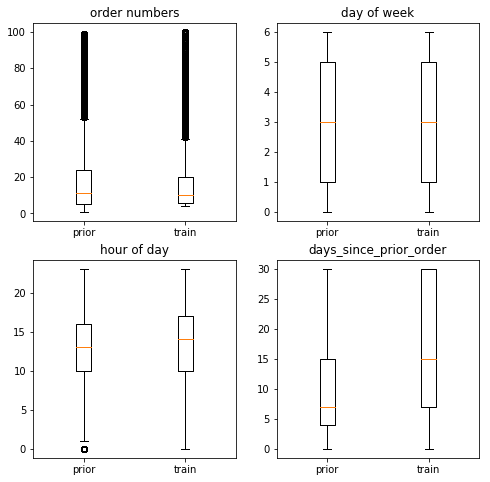

In [42]:
#box plot to show whether there are outliners
fig = plt.figure(figsize=(8,8))
a = fig.add_subplot(221)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['order_number'],ord_df[ord_df['eval_set']=='train']['order_number']])
a.set_xticks([1,2])
a.set_xticklabels(['prior','train'])
a.set_title('order numbers')

b = fig.add_subplot(222)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['order_dow'],ord_df[ord_df['eval_set']=='train']['order_dow']])
b.set_xticks([1,2])
b.set_xticklabels(['prior','train'])
b.set_title('day of week')

c = fig.add_subplot(223)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['order_hour_of_day'],ord_df[ord_df['eval_set']=='train']['order_hour_of_day']])
c.set_xticks([1,2])
c.set_xticklabels(['prior','train'])
c.set_title('hour of day')

d = fig.add_subplot(224)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['days_since_prior_order'].dropna(),ord_df[ord_df['eval_set']=='train']['days_since_prior_order']])
d.set_xticks([1,2])
d.set_xticklabels(['prior','train'])
d.set_title('days_since_prior_order')
plt.show()